In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db = pd.read_csv('3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv')
db['Recidivism - Return to Prison numeric'].value_counts()

0    17339
1     8681
Name: Recidivism - Return to Prison numeric, dtype: int64

In [4]:
#db["Race - Ethnicity"].value_counts()
etnia_motivo = pd.crosstab(db["Race - Ethnicity"], db["Convicting Offense Subtype"], normalize=True)*100
k = etnia_motivo.sum().sort_values(ascending=False)

In [5]:
#zero = pd.crosstab(db[db["Recidivism - Return to Prison numeric"]==0])
db

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,White - Hispanic,25-34,C Felony,Violent,Murder/Manslaughter,NaN,Discharged End of Sentence,Discharged End of Sentence,Yes,0
26016,2015,2018,White - Non-Hispanic,25-34,D Felony,Property,Vandalism,5JD,Paroled to Detainer - Out of State,Paroled to Detainer,No,0
26017,2015,2018,Black - Non-Hispanic,Under 25,Aggravated Misdemeanor,Violent,Other Violent,1JD,Discharged End of Sentence,Discharged End of Sentence,Yes,0
26018,2015,2018,White - Non-Hispanic,Under 25,D Felony,Drug,Other Drug,5JD,Parole,Parole,No,0


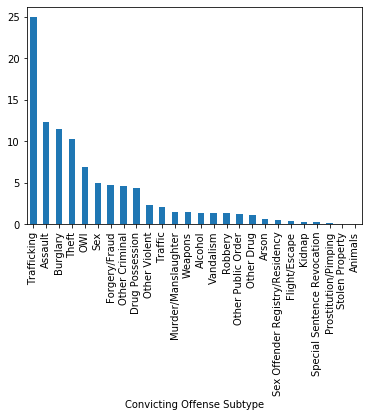

In [6]:
k.plot(kind='bar', legend=False)

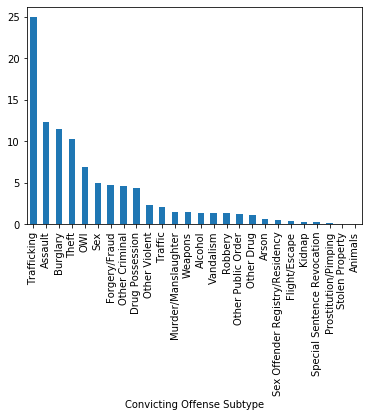

In [7]:
k.plot(kind='bar', by="Recidivism - Return to Prison numeric")

In [27]:
def exploratoria (data,compara, num=[], cat=[]):
    d0=data[data[compara]==0]
    d1=data[data[compara]==1]
    cros={}
    hist0={}
    hist1={}
    box={}
    for c in cat:
        print(pd.crosstab(data[c],data[compara]))
        cros[c] = pd.crosstab(data[c],data[compara])
        hist1[c] = d1[c].hist(density=True,xrot=45)
        hist0[c] = d0[c].hist(density=True,xrot=45)
    for n in num:
        plt.figure()
        data.boxplot(column = [n], by = compara)
        box[c]=data.boxplot(column = [n], by = compara)
    return{'crosstab':cros,'hist_0':hist0,'hist_1':hist1,'boxplot':box}
        
    

Recidivism - Return to Prison numeric     0     1
Fiscal Year Released                             
2010                                   2589  1127
2011                                   2755  1162
2012                                   3230  1510
2013                                   3082  1605
2014                                   2963  1623
2015                                   2720  1654
Recidivism - Return to Prison numeric     0     1
Recidivism Reporting Year                        
2013                                   2589  1127
2014                                   2755  1162
2015                                   3230  1510
2016                                   3082  1605
2017                                   2963  1623
2018                                   2720  1654
Recidivism - Return to Prison numeric                0     1
Race - Ethnicity                                            
American Indian or Alaska Native - Hispanic         14     6
American Indian o

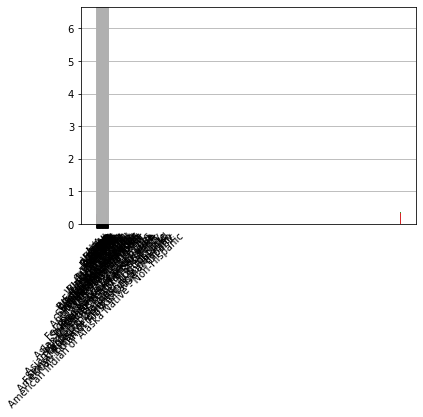

<Figure size 432x288 with 0 Axes>

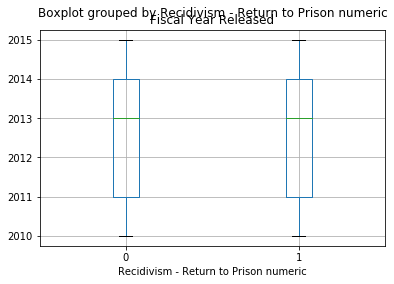

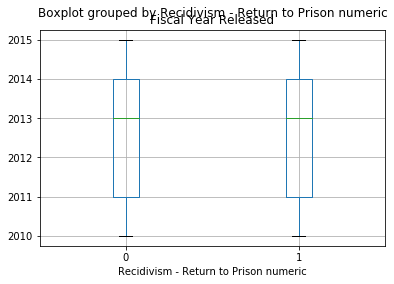

<Figure size 432x288 with 0 Axes>

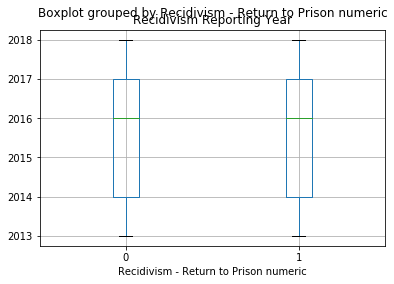

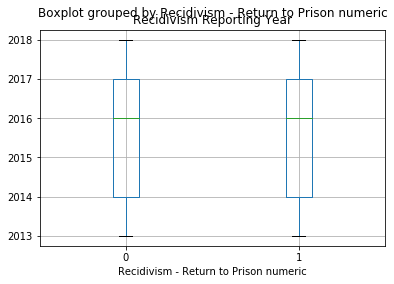

In [28]:
explora=exploratoria(db,'Recidivism - Return to Prison numeric',num=['Fiscal Year Released','Recidivism Reporting Year'],cat=['Fiscal Year Released','Recidivism Reporting Year','Race - Ethnicity','Convicting Offense Classification','Convicting Offense Type','Convicting Offense Subtype','Main Supervising District','Release Type','Release type: Paroled to Detainder united','Part of Target Population'])
#'Age At Release' nao funciona

In [18]:
explora['crosstab']['Fiscal Year Released']


Recidivism - Return to Prison numeric,0,1
Fiscal Year Released,,
2010,2589,1127
2011,2755,1162
2012,3230,1510
2013,3082,1605
2014,2963,1623
2015,2720,1654
